# Prerequisite: Data set

## Loading the email-Eu-core Dataset in Google Colab

In this notebook, we will obtain and load the **email-Eu-core** dataset.

This dataset captures internal email communications within a large European research institution.

- **Nodes**: 1,005 (employees)
- **Edges**: 25,571 (emails sent)
- **Data format**: Each line is a directed edge: `<sender> <receiver>`

Also available: department labels for each node: in `email-Eu-core-department-labels.txt.gz` file that we won't use for now.

Useful for studying network structure, community detection, and information flow.

[View dataset](https://snap.stanford.edu/data/email-Eu-core.html)

In [1]:
import utils
import networkx as nx
import pandas as pd
from matplotlib import pyplot as plt

try:
    import seaborn as sns
except ImportError:
    ! pip install seaborn
    import seaborn as sns

In [2]:
url = "https://snap.stanford.edu/data/email-Eu-core.txt.gz"
zip_filename = "email-Eu-core.txt.gz"
local_folder = "./data"
data_file_path = utils.download_and_extract_data(
    zip_url=url,
    zip_filename=zip_filename,
    local_folder=local_folder,
    filetype="csv.gz",
)
data_file_path

Not running in Colab. Using local folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
Using data folder: /Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data
ZIP file already exists.
Extraction complete.


'/Users/boris/Documents/teaching/ML on graphs/ML-on-Graphs/data/email-Eu-core.txt'

In [3]:
pd.read_csv(data_file_path, sep=" ", names=["src", "dst"]).head()

,src,dst
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


In [4]:
G = nx.read_edgelist(
    data_file_path,
    create_using=nx.DiGraph,  # Note: this is a directed graph
)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Sample edges:", list(G.edges())[:10])

Number of nodes: 1005
Number of edges: 25571
Sample edges: [('0', '1'), ('0', '316'), ('0', '146'), ('0', '268'), ('0', '581'), ('0', '221'), ('0', '18'), ('0', '734'), ('0', '178'), ('0', '380')]


In [5]:
# draw: approx 45 seconds
# nx.draw(G, arrowstyle="->", with_labels=False)

# Unit 3: Advanced Network Properties


### Discussion / Feedback

- We’ve confirmed the graph has around 1005 nodes and 25571 edges.  
- Edges are directed, so you might see `(123, 456)` which means user 123 sent an email to user 456.
- Next, we’ll use this graph for analyzing **centrality**, **connectivity**, **density**, etc.




## 3.1 Centrality Metrics: Betweenness, Closeness, Eigenvector Centrality

### Objective
- Compute and interpret key centrality metrics to identify important nodes in the email network.

### Description
- **Betweenness Centrality**: Finds "bridge" nodes on many shortest paths.  
- **Closeness Centrality**: Identifies nodes that can reach others quickly (on average).  
- **Eigenvector Centrality**: Rewards nodes connected to other high-scoring nodes.

We'll see how these measures might reveal central staff or departments in an institution.


## 3.1.1 Code Example: Centrality Calculations



In [6]:
# Small toy graph
T = nx.Graph()
edges = [(0, 1), (0, 2), (1, 3), (2, 3), (3, 4)]
T.add_edges_from(edges)
pos = nx.spring_layout(T, seed=42)

Centrality quantifies the importance of a node within a network based on its position and connections.

### **Betweenness Centrality** 

measures how often a node lies on the shortest paths between other nodes. 

Nodes with high betweenness act as bridges or brokers, influencing information flow.

Text(0.5, 1.0, 'Betweenness Centrality')

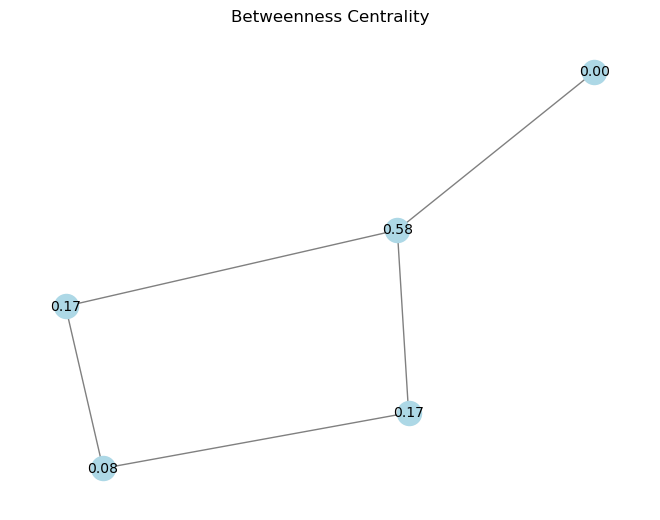

In [7]:
# Betweenness Centrality
betweenness = nx.betweenness_centrality(T)
nx.draw(T, pos, with_labels=False, node_color="lightblue", edge_color="gray")
labels = {n: f"{betweenness[n]:.2f}" for n in T.nodes()}
nx.draw_networkx_labels(T, pos, labels=labels, font_size=10)
plt.title("Betweenness Centrality")


### **Closeness Centrality** 

reflects how near a node is to all others in terms of shortest paths. 

A high closeness score means faster access to all parts of the network, useful for efficient communication.

Text(0.5, 1.0, 'Closeness Centrality')

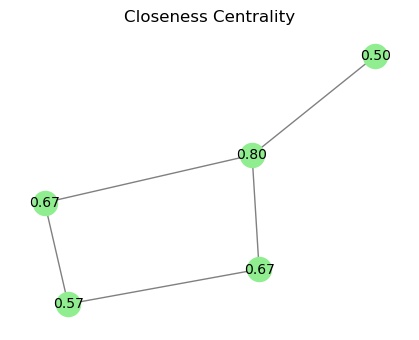

In [8]:
# Closeness Centrality
closeness = nx.closeness_centrality(T)
plt.figure(figsize=(4, 3))
nx.draw(T, pos, with_labels=False, node_color="lightgreen", edge_color="gray")
labels = {n: f"{closeness[n]:.2f}" for n in T.nodes()}
nx.draw_networkx_labels(T, pos, labels=labels, font_size=10)
plt.title("Closeness Centrality")



### **Eigenvector Centrality** 

scores nodes based on connections to other well-connected nodes. 

It identifies influential nodes in networks where prestige or popularity matters, like social or citation networks.


Text(0.5, 1.0, 'Eigenvector Centrality')

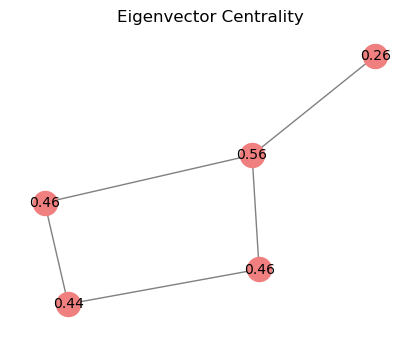

In [9]:
# Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(T, max_iter=1000)
plt.figure(figsize=(4, 3))
nx.draw(T, pos, with_labels=False, node_color="lightcoral", edge_color="gray")
labels = {n: f"{eigenvector[n]:.2f}" for n in T.nodes()}
nx.draw_networkx_labels(T, pos, labels=labels, font_size=10)
plt.title("Eigenvector Centrality")

Back to the real-world email network.

In [10]:
# Betweenness centrality: can be expensive; consider approximation (k=50)
betweenness = nx.betweenness_centrality(G, k=50, normalized=True, endpoints=False)

# Closeness centrality
closeness = nx.closeness_centrality(G)

# Eigenvector centrality: might need more iterations for large graphs
eigenvector = nx.eigenvector_centrality(G, max_iter=500, tol=1e-03)

# Sort and display top 5 nodes by betweenness
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by betweenness centrality:")
for node, val in sorted_betweenness:
    print(f"Node: {node}, Betweenness: {val:.5f}")

Top 5 nodes by betweenness centrality:
Node: 86, Betweenness: 0.05749
Node: 160, Betweenness: 0.05378
Node: 62, Betweenness: 0.02996
Node: 411, Betweenness: 0.02692
Node: 333, Betweenness: 0.02524


### Notes

- We used `k=50` to approximate betweenness, speeding up calculations for large graphs.  
- `max_iter=500` in eigenvector centrality helps ensure convergence in a reasonable time.  
- `tol=1e-03` is a convergence tolerance for eigenvector centrality.
- The top 5 nodes by betweenness likely act as major email “bridges” between departments.



Despite different definitions, all three measures correlate with each other: it is expected that a node with high betweenness will also have high closeness and eigenvector centrality. However, they are not identical and different centrality measures highlight different aspects of node importance.

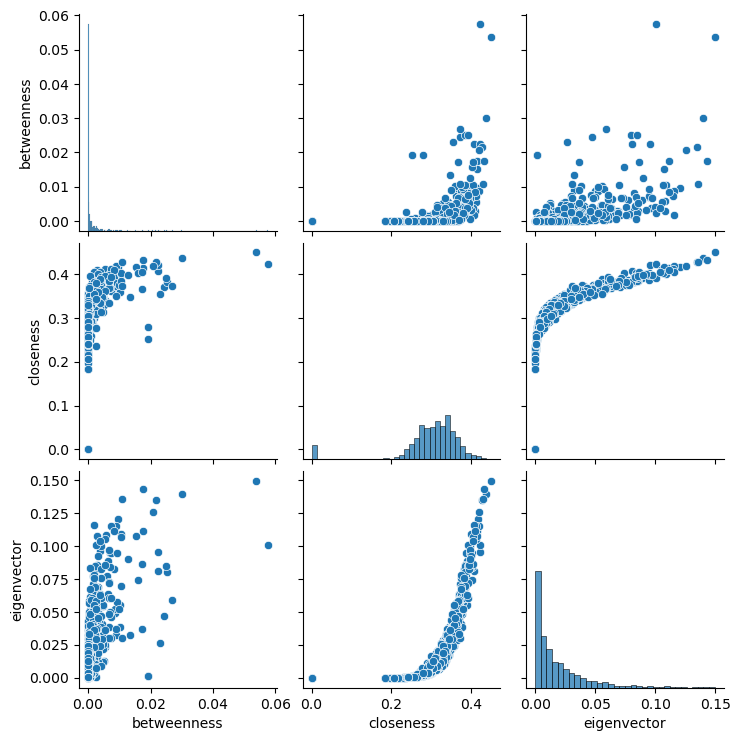

In [11]:
df_centralities = pd.DataFrame(
    {
        "betweenness": list(betweenness.values()),
        "closeness": list(closeness.values()),
        "eigenvector": list(eigenvector.values()),
    }
)
sns.pairplot(df_centralities)


## 3.1.2 Practice Activity: Visualize Top Nodes by Eigenvector Centrality

**Goal**:  
- Plot a bar chart of the top 10 nodes ranked by eigenvector centrality.

**Guiding Text**: "Try to accomplish this by sorting the eigenvector scores and using Matplotlib to create a bar chart."


<Axes: >

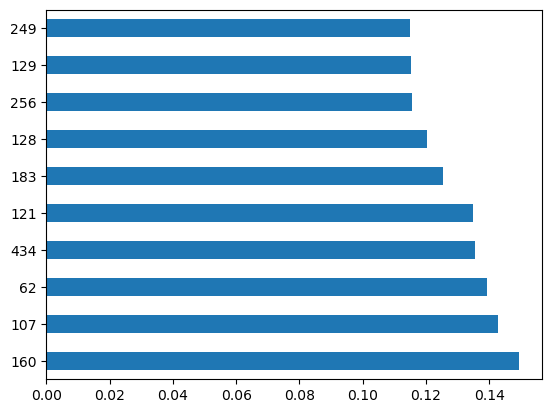

In [12]:
(pd.Series(eigenvector).sort_values(ascending=False).head(10).plot(kind="barh"))

### Quiz: Centrality Understanding

1. **Q:** What does a node with **high betweenness centrality** imply in an email network?  

2. **Multiple Choice**  
   **Q:** Which metric best indicates a node that can quickly reach others in the network?  
   - a) Betweenness Centrality  
   - b) Closeness Centrality  
   - c) Eigenvector Centrality  
   - d) Clustering Coefficient  

3. **Q:** In your opinion, why might an influential node by eigenvector centrality not appear in the top 5 for betweenness centrality?

## 3.2 Graph Connectivity: Weak and Strong Components

### Objective
- Understand how nodes group into weakly or strongly connected components in the directed email network.

### Description
- **Weak Components**: Nodes are in the same component if they’re connected ignoring edge direction.  
- **Strong Components**: Nodes are mutually reachable following directed edges.


In [13]:
num_weak_components = nx.number_weakly_connected_components(G)
num_strong_components = nx.number_strongly_connected_components(G)

print("Weakly connected components:", num_weak_components)
print("Strongly connected components:", num_strong_components)

# Find the largest strongly connected component (SCC)
largest_scc = max(nx.strongly_connected_components(G), key=len)
print("Size of largest SCC:", len(largest_scc), "out of ", G.number_of_nodes())

Weakly connected components: 20
Strongly connected components: 203
Size of largest SCC: 803 out of  1005


### Practice Activity: Visualize Largest SCC

**Task**:  
1. Create a subgraph of the largest SCC.  
2. Draw the subgraph using NetworkX (limit to, say, 50–100 nodes if it’s still large).


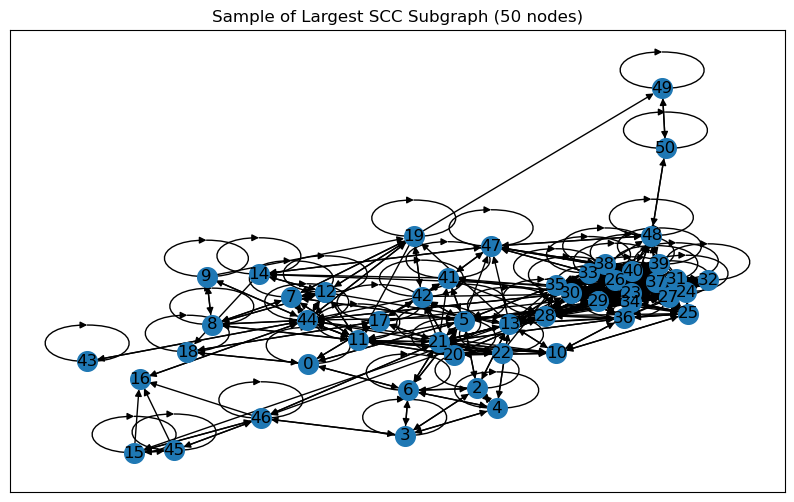

In [14]:
# CODE CELL: Visualize Largest SCC Subgraph

H = G.subgraph(largest_scc).copy()

# For demonstration, let's pick a sample of 50 nodes to visualize
sample_nodes = list(H.nodes())[:50]
H_sample = H.subgraph(sample_nodes)

plt.figure(figsize=(10, 6))
nx.draw_networkx(H_sample, with_labels=True, node_size=200)
plt.title("Sample of Largest SCC Subgraph (50 nodes)")
plt.show()

### Feedback / Discussion

- In a directed email graph, strong connectivity implies you can go from any node to any other node following edge directions.  
- The largest SCC in this dataset has about 803 nodes, indicating a significant portion of the network is mutually reachable.

## 3.3 Graph Density and Sparsity

### Objective
- Learn to calculate and interpret the density of the email network.

### Description
- **Density**: Proportion of possible edges that are actually present.  
- **Sparsity**: How close the network is to having very few edges relative to the maximum possible.


**Recall global clustering coefficient** from the previous unit:  
It measures the likelihood that two neighbors of a node are also connected—i.e., the tendency to form triangles.

**Difference**:  
- **Density** is a global measure of how connected the entire graph is.  
- **Clustering coefficient** focuses on local patterns of connection, especially triangle formation.


In [15]:
density = nx.density(G)
print(f"Overall Graph Density: {density:.5f}")

Overall Graph Density: 0.02534


In [16]:
# compute density for each strongly connected component
scc_densities = []
for i, scc in enumerate(nx.strongly_connected_components(G)):
    scc_subgraph = G.subgraph(scc)
    scc_density = nx.density(scc_subgraph)
    scc_densities.append(
        {
            "SCC": i,
            "n_nodes": len(scc),
            "n_edges": scc_subgraph.number_of_edges(),
            "density": scc_density,
        }
    )
scc_densities = pd.DataFrame(scc_densities).sort_values(by="density", ascending=False)
scc_densities = scc_densities.loc[scc_densities.density > 0.000].reset_index(drop=True)
scc_densities

,SCC,n_nodes,n_edges,density
0,162,803,24729,0.038399


In [17]:
# compute density for each WEAKLY connected component
wcc_densities = []
for i, wcc in enumerate(nx.weakly_connected_components(G)):
    wcc_subgraph = G.subgraph(wcc)
    wcc_density = nx.density(wcc_subgraph)
    wcc_densities.append(
        {
            "WCC": i,
            "n_nodes": len(wcc),
            "n_edges": wcc_subgraph.number_of_edges(),
            "density": wcc_density,
        }
    )
wcc_densities = pd.DataFrame(wcc_densities).sort_values(by="density", ascending=False)
wcc_densities = wcc_densities.loc[wcc_densities.density > 0.000].reset_index(drop=True)
wcc_densities

,WCC,n_nodes,n_edges,density
0,0,986,25552,0.026309


## 3.5 Additional Analysis, Summary, and Next Steps

### Key Takeaways
- The email-Eu-core dataset is a large directed network with notable connectivity and varying centralities.
- Betweenness, closeness, and eigenvector centralities can highlight different "important" nodes.
- The largest SCC indicates strong inter-department collaboration among a big subset of the network.

### Further Reading and References
- [NetworkX Documentation](https://networkx.org/documentation/stable/)
- [SNAP Datasets Overview](https://snap.stanford.edu/)
- Papers on organizational email networks and community detection.

### Optional Enhancements
- Community Detection: Compare ground-truth departments with algorithmic communities (Louvain, etc.).
- Interactive Visualizations: Use PyVis or Plotly for dynamic graph exploration.
- Temporal Analysis: If timestamps or message counts are available, explore how communication changes over time.

# End of Unit 3: Advanced Network Properties


## Homework 

1. Obtain the department labels for the nodes in the email-Eu-core dataset. See [View dataset](https://snap.stanford.edu/data/email-Eu-core.html) for more details.

2. Consider the entire graph: Identify which departments have the highest average closeness centrality.


3. Identify the 200 nodes with highest betweeness centrality. For each of these nodes, identify with how many nodes of other departments it is connected to. Plot a scatterplot with the number of cross-department edges (X-axis) vs. betweenness centrality (Y-axis). 

4. What do you observe?


## Answers to Quiz: Centrality Understanding

**Q1 (Short Answer):** What does a node with **high betweenness centrality** imply in an email network?
- **A1:** A node with high betweenness centrality in an email network implies that this node acts as a "bridge" or intermediary in communication flow. It lies on a significant number of shortest paths between other nodes, meaning that many emails would have to go through this node to reach other parts of the network. This makes them a potentially influential or critical node for information exchange.

**Q2 (Multiple Choice):** Which metric best indicates a node that can quickly reach others in the network?
- **A2:** b) **Closeness Centrality**

**Q3 (Short Answer):** In your opinion, why might an influential node by eigenvector centrality not appear in the top 5 for betweenness centrality?
- **A3:** An influential node by eigenvector centrality may not appear in the top 5 for betweenness centrality because eigenvector centrality measures the influence of a node based on the influence of its neighbors. A node can be highly connected to other highly connected nodes (thus high eigenvector), but not lie on many of the shortest paths between arbitrary pairs of nodes, which is how betweenness is measured. They may be influential in their local cluster, but not across the entire network as "bridges".